<a href="https://colab.research.google.com/github/MustaqHameed/Student-performance-using-Machine-Learning/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Work/student.csv")

In [5]:
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [7]:
data.shape

(2392, 15)

In [8]:
print(data.columns)


Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')


In [9]:
features = ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']


In [10]:
target = 'GPA'


In [11]:
data = data.dropna()


In [12]:
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

In [14]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [15]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [16]:
# XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [17]:
# Function to calculate errors
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{model_name} Performance:")
    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}\n")
    return mse, rmse, mae

In [18]:
# Evaluate models
errors = {}
errors['Polynomial Regression'] = evaluate_model(y_test, y_pred_poly, "Polynomial Regression")
errors['Random Forest'] = evaluate_model(y_test, y_pred_rf, "Random Forest")
errors['Decision Tree'] = evaluate_model(y_test, y_pred_dt, "Decision Tree")
errors['XGBoost'] = evaluate_model(y_test, y_pred_xgb, "XGBoost")

Polynomial Regression Performance:
MSE: 0.0400, RMSE: 0.2001, MAE: 0.1571

Random Forest Performance:
MSE: 0.0605, RMSE: 0.2460, MAE: 0.1908

Decision Tree Performance:
MSE: 0.1109, RMSE: 0.3330, MAE: 0.2646

XGBoost Performance:
MSE: 0.0575, RMSE: 0.2398, MAE: 0.1891



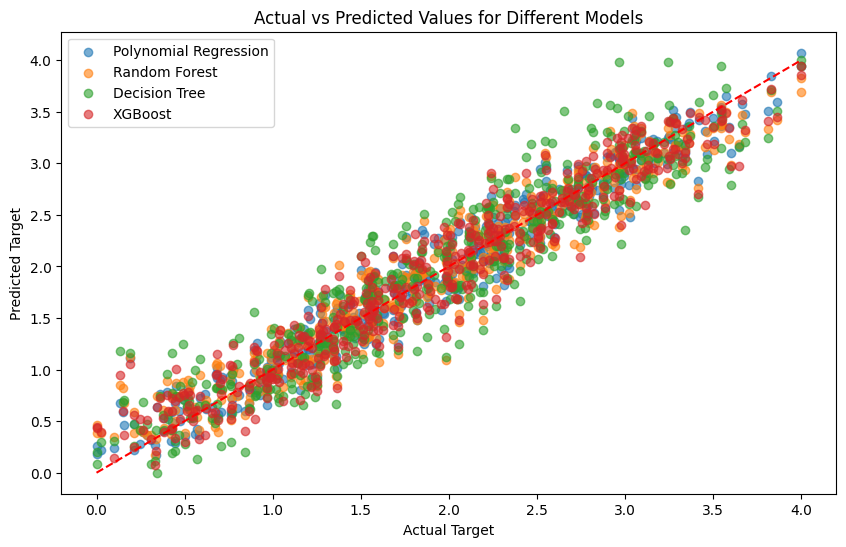

In [19]:
# Visualization
plt.figure(figsize=(10,6))
for model_name, y_pred in zip(["Polynomial Regression", "Random Forest", "Decision Tree", "XGBoost"],
                              [y_pred_poly, y_pred_rf, y_pred_dt, y_pred_xgb]):
    plt.scatter(y_test, y_pred, label=model_name, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.legend()
plt.title("Actual vs Predicted Values for Different Models")
plt.show()

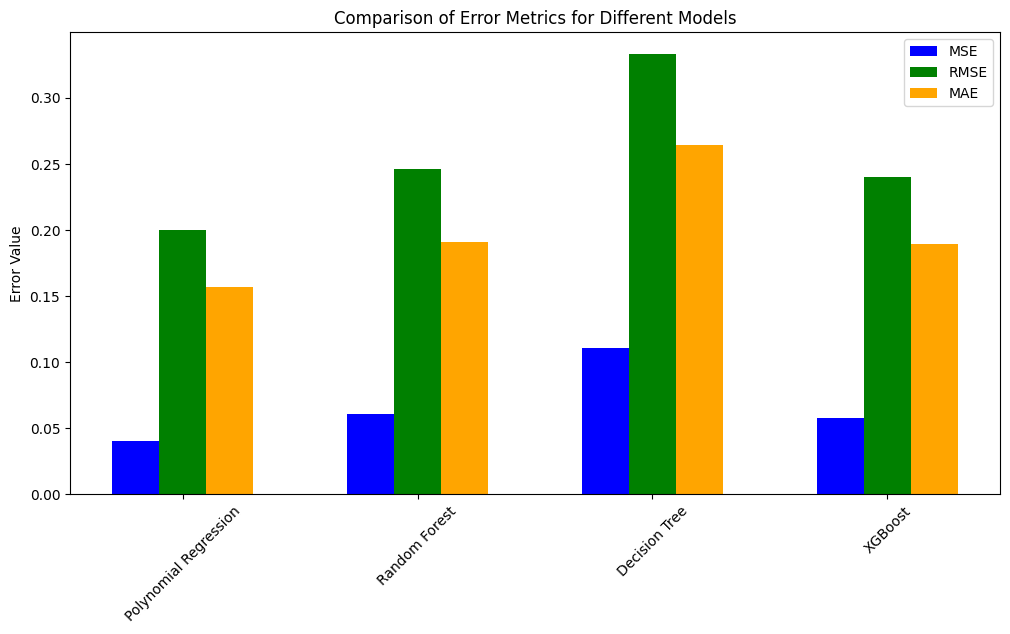

In [20]:
# Bar plot for error comparison
mse_values = [errors[model][0] for model in errors]
rmse_values = [errors[model][1] for model in errors]
mae_values = [errors[model][2] for model in errors]

x_labels = list(errors.keys())
x_pos = np.arange(len(x_labels))

plt.figure(figsize=(12,6))
plt.bar(x_pos - 0.2, mse_values, width=0.2, label='MSE', color='blue')
plt.bar(x_pos, rmse_values, width=0.2, label='RMSE', color='green')
plt.bar(x_pos + 0.2, mae_values, width=0.2, label='MAE', color='orange')
plt.xticks(x_pos, x_labels, rotation=45)
plt.ylabel("Error Value")
plt.title("Comparison of Error Metrics for Different Models")
plt.legend()
plt.show()

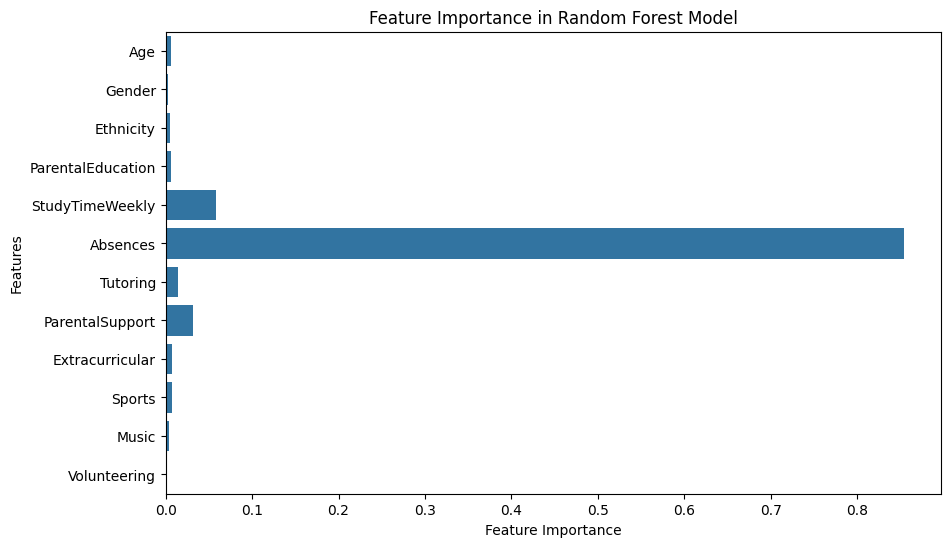

In [21]:
# Feature Importance for Random Forest
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=features)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()